# Find region of the sky with no extinction

In [20]:
import pandas as pd
test_data=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data')[['parallax','ks_m','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m']]
test_error=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err')


<Axes: xlabel='phot_g_mean_mag', ylabel='parallax_error'>

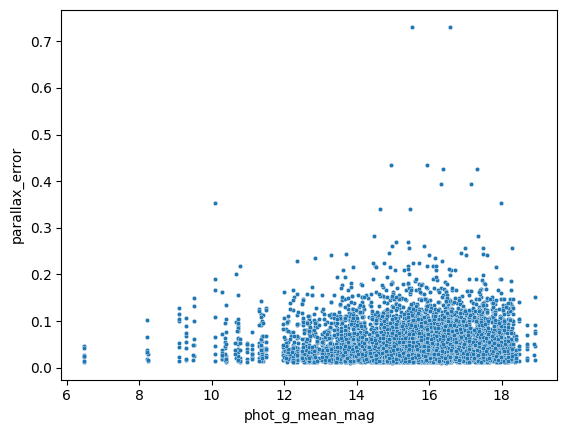

In [23]:
import seaborn as sn
sn.scatterplot(pd.concat([test_data,test_error],axis=1)[::32],x='phot_g_mean_mag',y='parallax_error',s=10)

In [1]:
# A cross match script for Gaia G, BP/RP spectra and LAMOST.
# Later include the ability to pull in other passbands.
from copyreg import pickle
import wave
import pandas as pd
from astropy.coordinates import SkyCoord, Galactic
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from gaiaxpy import convert,calibrate
import pickle
import re


def GetGAIAData_BPRP(arr):
    x,y=arr
    # gets the GAIA data for the provided GaiaDR2SourceIDs's
    # and writes to a local CSV
    dfs=[]    
    dfGaia = pd.DataFrame()
   
    #job = Gaia.launch_job_async( "select top 100 * from gaiadr2.gaia_source where parallax>0 and parallax_over_error>3. ") # Select `good' parallaxes
    qry = "SELECT * \
    FROM gaiadr3.gaia_source AS g, gaiaedr3_distance as d \
    WHERE DISTANCE(%f, %f, g.ra, g.dec) < 45./60.\
    AND has_xp_continuous = 'True'\
    AND g.source_id = d.source_id;" % (x, y)


    
    job = Gaia.launch_job_async( qry )
    tblGaia = job.get_results()       #Astropy table
    dfGaia = tblGaia.to_pandas()      #convert to Pandas dataframe
    return dfGaia

def Get2MASSData(GaiaDR2SourceIDs, FolderForLocalStorage):
    # gets the GAIA data for the provided GaiaDR2SourceIDs's
    # and writes to a local CSV
    dfs=[]    
    dfGaia = pd.DataFrame()
   
    #job = Gaia.launch_job_async( "select top 100 * from gaiadr2.gaia_source where parallax>0 and parallax_over_error>3. ") # Select `good' parallaxes
    qry ="SELECT * \
        FROM gaiadr3.gaia_source AS g \
        JOIN gaiadr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id) \
        JOIN gaiadr3.tmass_psc_xsc_join AS xjoin USING (clean_tmass_psc_xsc_oid) \
        JOIN gaiadr1.tmass_original_valid AS tmass ON xjoin.original_psc_source_id = tmass.designation \
        WHERE  g.source_id in {}".format(GaiaDR2SourceIDs)

    
    job = Gaia.launch_job_async( qry )
    tblGaia = job.get_results()       #Astropy table
    dfGaia = tblGaia.to_pandas()      #convert to Pandas dataframe
    return dfGaia




INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [2]:
def split_range(n, m):
    result = [list(range(i, min(i + m, n))) for i in range(0, n, m)]
    return result

In [143]:
def bp_rp_data(merged_df):




    idxs=split_range(len(merged_df),4999)

    for i in range(len(idxs)):
    #for i in range(1):

        y=calibrate(list(merged_df['source_id'].astype(str).values[idxs[i]]),sampling=np.arange(392,992,10))
        if(i==0):
            bprp=y[0]
        else:
            bprp=pd.concat([bprp,y[0]],axis=0)


    final_bprp = pd.merge(merged_df, bprp, how='inner', on='source_id')
    
# Drop one of the duplicate columns (either 'gaia_source_id' or 'source_id')
    final_bprp = final_bprp.drop_duplicates(subset=['source_id'])
    return final_bprp

In [146]:
y=bp_rp_data(combined_data)

In [147]:
y=y[y['ruwe']<1.4].reset_index(drop=True)
y=y[y['phot_bp_mean_mag']<22].reset_index(drop=True)
y=y[y['phot_rp_mean_mag']<22].reset_index(drop=True)

In [148]:
for number in wls:
    column_name = number  # You can customize the column name
    y[column_name] = np.NaN
    y[column_name+'_err'] = np.NaN

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_80461/1282516890.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y[column_name] = np.NaN
/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_80461/1282516890.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y[column_name+'_err'] = np.NaN
/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_80461/1282516890.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

In [149]:
-2.5*np.log10(y['flux'][0])

array([40.32964348, 39.72684648, 39.61997659, 39.63873956, 39.7266301 ,
       39.53734592, 39.4474136 , 39.41755132, 39.42722908, 39.43017437,
       39.4902527 , 39.47640863, 39.52433683, 39.54286513, 39.50815634,
       39.50684367, 39.51454313, 39.53291551, 39.51759733, 39.51738619,
       39.56933305, 39.57951335, 39.59159278, 39.61750099, 39.60611782,
       39.63687652, 39.70481979, 39.7164396 , 39.73867665, 39.72233149,
       39.77850817, 39.80465638, 39.82005331, 39.85180056, 39.8769742 ,
       39.89761557, 39.92822324, 39.93641382, 39.96590484, 39.97507528,
       40.01961136, 40.03924089, 40.06508786, 40.10116468, 40.12251347,
       40.13410262, 40.21139769, 40.22228627, 40.21533277, 40.21163835,
       40.24610551, 40.27442803, 40.30141984, 40.33876162, 40.33913271,
       40.36378774, 40.41353328, 40.39372261, 40.42383022, 40.50843842])

In [193]:
for i in range(len(y)):
    y.loc[i,wls]=-2.5*np.log10(np.abs(y['flux'][i]))
    y.loc[i,[wls[j]+'_err' for j in range(len(wls))]]=y['flux_error'][i]*(2.5/np.log(10))/np.abs(y['flux'][i])

In [194]:
y

,source_id,DESIGNATION,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,angular_distance,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,...,942_err,952,952_err,962,962_err,972,972_err,982,982_err,g_error
0,6500767842443704832,Gaia DR3 6500767842443704832,0.0354,0.0285,0.0407,0.026486,719.229736,0.000000,2.969226e-15,-0.742814,...,0.011387,40.413533,0.014225,40.393723,0.014795,40.423830,0.015239,40.508438,0.021837,0.000357
1,6500767842443704960,Gaia DR3 6500767842443704960,0.0450,0.0378,0.0533,0.033035,730.878052,0.000000,0.000000e+00,0.089943,...,0.022159,42.099481,0.027655,42.027886,0.028303,42.073898,0.030371,42.203349,0.044882,0.000340
2,6500768563998207104,Gaia DR3 6500768563998207104,NaN,NaN,NaN,0.126821,768.901550,0.000000,0.000000e+00,0.591684,...,0.025874,42.376036,0.030595,42.349256,0.033065,42.366147,0.035599,42.412853,0.046404,0.000421
3,6500768873235852800,Gaia DR3 6500768873235852800,0.0255,0.0191,0.0398,0.106239,685.475830,0.000000,0.000000e+00,-1.026823,...,0.008904,40.055546,0.010917,40.026182,0.011357,40.065731,0.011903,40.128785,0.016500,0.000113
4,6500769113754023552,Gaia DR3 6500769113754023552,0.0027,0.0007,0.0071,0.067419,690.617310,0.000000,0.000000e+00,-0.979187,...,0.041219,43.084526,0.051112,43.084543,0.056634,43.174674,0.064275,43.272155,0.091809,0.000314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,6517452278558972416,Gaia DR3 6517452278558972416,0.0572,0.0193,0.0931,0.038356,358.345947,0.067871,5.311004e-01,0.363172,...,0.045411,42.992756,0.061348,42.922419,0.062331,42.908347,0.063335,43.080337,0.098429,0.000489
5539,6517452484717399680,Gaia DR3 6517452484717399680,0.0060,0.0019,0.0115,0.084411,388.354309,0.006241,2.689250e-02,0.930705,...,0.017962,40.938449,0.023032,40.943712,0.024261,40.934075,0.024458,41.025423,0.035136,0.000262
5540,6517452622156352384,Gaia DR3 6517452622156352384,0.0019,0.0004,0.0047,0.080527,399.277344,0.000000,0.000000e+00,0.844485,...,0.023276,41.481637,0.027675,41.570193,0.032029,41.614647,0.034127,41.535219,0.042453,0.000259
5541,6517456363072019456,Gaia DR3 6517456363072019456,0.0027,0.0007,0.0076,0.133862,362.160919,0.000000,0.000000e+00,-1.292150,...,0.063289,43.482256,0.088191,43.512381,0.102517,43.333942,0.092468,43.437176,0.131149,0.000696


In [195]:
y['g_error']=(1/y['phot_g_mean_flux_over_error']*(2.5/np.log(10)))

In [196]:
inputs=pd.concat([y[['ks_m','parallax','phot_g_mean_mag','j_m','h_m']],y[wls]],axis=1)
error=pd.concat([y[['ks_msigcom','parallax_error','g_error','j_msigcom','h_msigcom']],y[[wls[i]+'_err' for i in range(len(wls))]]],axis=1)

In [198]:
for i in range(10):
    if(i==0):
        sigma=error.copy()
        x=inputs.copy()
    x=pd.concat([x,inputs.copy()+np.random.normal(size=error.values.shape)*error.copy().values])
    sigma=pd.concat([sigma,error.copy()])


In [199]:
y.tail(2)['flux']

5541    [-1.9174929953297377e-19, 2.3092123195391276e-...
5542    [7.347514739501711e-19, 3.4970163682387535e-18...
Name: flux, dtype: object

In [200]:
x=x.reset_index(drop=True)
sigma=sigma.reset_index(drop=True)

In [120]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler=StandardScaler()
scaler.fit_transform(x.T).T

array([[-4.38945902, -3.05163008, -3.16958111, ...,  0.18345989,
         0.18406265,  0.19474511],
       [-4.55375749, -2.93816728, -3.10926015, ...,  0.17866846,
         0.17929224,  0.19034729],
       [-4.48746327, -2.86299501, -3.1446438 , ...,  0.17739363,
         0.17802655,  0.18924367],
       ...,
       [-4.29697453, -2.82701263, -2.93718994, ...,  0.13228945,
         0.1392134 ,  0.1465821 ],
       [-4.66013639, -2.80328999, -3.04976423, ...,  0.16511079,
         0.16494408,  0.16540823],
       [-4.07012465, -2.97135644, -3.28755702, ...,  0.20567926,
         0.20458917,  0.21071629]])

In [202]:

(x-mean)/std

,ks_m,parallax,phot_g_mean_mag,j_m,h_m,392,402,412,422,432,...,892,902,912,922,932,942,952,962,972,982
0,-1.060219,-0.065758,-1.333799,-1.181154,-1.087848,-0.023547,-0.060342,-0.584100,-0.705513,-0.052322,...,-1.265820,-1.261132,-1.256550,-1.256773,-1.263387,-1.261527,-1.247297,-1.249951,-1.256530,-1.235352
1,-0.026022,-0.065792,-0.084160,-0.037847,-0.095372,-0.003234,-0.006783,-0.033189,-0.035202,-0.004090,...,-0.077808,-0.054421,-0.039717,-0.043139,-0.058994,-0.042674,-0.028779,-0.070794,-0.062854,-0.009239
2,-0.192803,0.453208,0.566770,0.049361,-0.056793,0.012122,0.033065,0.519830,0.523256,0.036745,...,0.196801,0.203625,0.212650,0.149859,0.153798,0.188694,0.171101,0.161095,0.148562,0.142318
3,-1.548378,0.837156,-1.431008,-1.518899,-1.520544,-0.018687,-0.052405,-0.521916,-0.603120,-0.048184,...,-1.514972,-1.516334,-1.509175,-1.511466,-1.508580,-1.501169,-1.506031,-1.515156,-1.515583,-1.509997
4,0.834540,-0.475393,0.398914,0.789148,0.863820,-0.005876,-0.005934,-0.038103,-0.060174,0.000589,...,0.644154,0.662821,0.643741,0.671967,0.700508,0.683249,0.683162,0.691653,0.733458,0.763944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60968,0.934987,-0.628334,0.290960,0.719682,0.756550,-0.010779,-0.017249,-0.093511,-0.108443,-0.006084,...,0.495613,0.558809,0.587349,0.502442,0.548471,0.586536,0.574590,0.599041,0.500367,0.757700
60969,-0.572819,-0.320088,-1.069126,-0.777831,-0.679677,-0.025089,-0.056906,-0.548900,-0.668894,-0.049348,...,-0.895128,-0.880229,-0.913442,-0.875687,-0.872636,-0.911349,-0.859085,-0.876849,-0.872886,-0.866961
60970,-0.217809,-0.403299,-0.630796,-0.363095,-0.257862,-0.017854,-0.041229,-0.367532,-0.452064,-0.031349,...,-0.493018,-0.431527,-0.455133,-0.489346,-0.407152,-0.425850,-0.425660,-0.413871,-0.389757,-0.468733
60971,0.672041,-0.011639,1.088770,0.794985,0.839032,0.017983,0.088754,0.424288,0.616753,0.051764,...,0.959490,0.973008,0.921209,0.971727,1.091077,0.800547,0.998031,0.934899,0.799673,0.928276


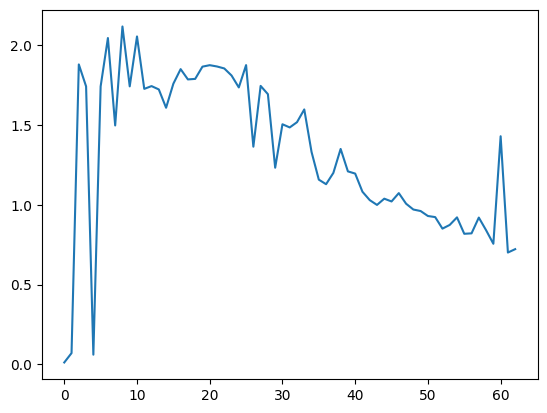

In [206]:
import matplotlib.pyplot as plt
check=((x-mean)/std).values
plt.plot(np.concatenate((check[1000,5:],check[1000,2:5])))